In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-shop/coffe.csv


# **Data Cleaning**

In [16]:
import pandas as pd
import numpy as np

df = pd.read_csv('/kaggle/input/coffee-shop/coffe.csv')

missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

# Strategy for handling missing values
if missing_values.sum() > 0:
    df['money'] = df['money'].fillna(df['money'].median())
    df['hour_of_day'] = df['hour_of_day'].fillna(df['hour_of_day'].median())
    df['coffee_name'] = df['coffee_name'].fillna(df['coffee_name'].mode()[0])
    df['Time_of_Day'] = df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])
    df['Weekday'] = df['Weekday'].fillna(df['Weekday'].mode()[0])
    df['Month_name'] = df['Month_name'].fillna(df['Month_name'].mode()[0])
    df = df.dropna(subset=['Date', 'Time'])
else:
    print("No missing values found.")

Missing Values per Column:
hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64
No missing values found.


**Combining Date and Time into a single datetime column**

In [20]:
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M.%S', errors='coerce')
print(df['datetime'].head())

0   2024-03-01 15:50:05
1   2024-03-01 19:22:05
2   2024-03-01 20:18:01
3                   NaT
4                   NaT
Name: datetime, dtype: datetime64[ns]


**Removing duplicate rows if any**

In [22]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New dataset shape: {df.shape}")
else:
    print("No duplicates found.")

Number of duplicate rows: 0
No duplicates found.


# **Descriptive Analysis**

**Different Types of Coffee Sold**

In [23]:
coffee_types = df['coffee_name'].unique()
print("Different types of coffee sold:")
print(coffee_types)

Different types of coffee sold:
['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']


**Total Revenue from All Sales**

In [24]:
total_revenue = df['money'].sum()
print(f"Total revenue from all sales: ${total_revenue:.2f}")

Total revenue from all sales: $112245.58


**Average Price of a Coffee**

In [25]:
average_price = df['money'].mean()
print(f"Average price of a coffee: ${average_price:.2f}")

Average price of a coffee: $31.65


**Most Expensive and Least Expensive Coffee**

In [27]:
most_expensive = df.loc[df['money'].idxmax(), ['coffee_name', 'money']]
least_expensive = df.loc[df['money'].idxmin(), ['coffee_name', 'money']]
print(f"Most expensive coffee: {most_expensive['coffee_name']} (${most_expensive['money']:.2f})")
print(f"Least expensive coffee: {least_expensive['coffee_name']} (${least_expensive['money']:.2f})")

Most expensive coffee: Latte ($38.70)
Least expensive coffee: Espresso ($18.12)


**Number of Sales Using a Credit Card**

In [28]:
credit_card_sales = df[df['cash_type'] == 'card'].shape[0]
print(f"Number of sales using a credit card: {credit_card_sales}")

Number of sales using a credit card: 3547


# **Visualization**

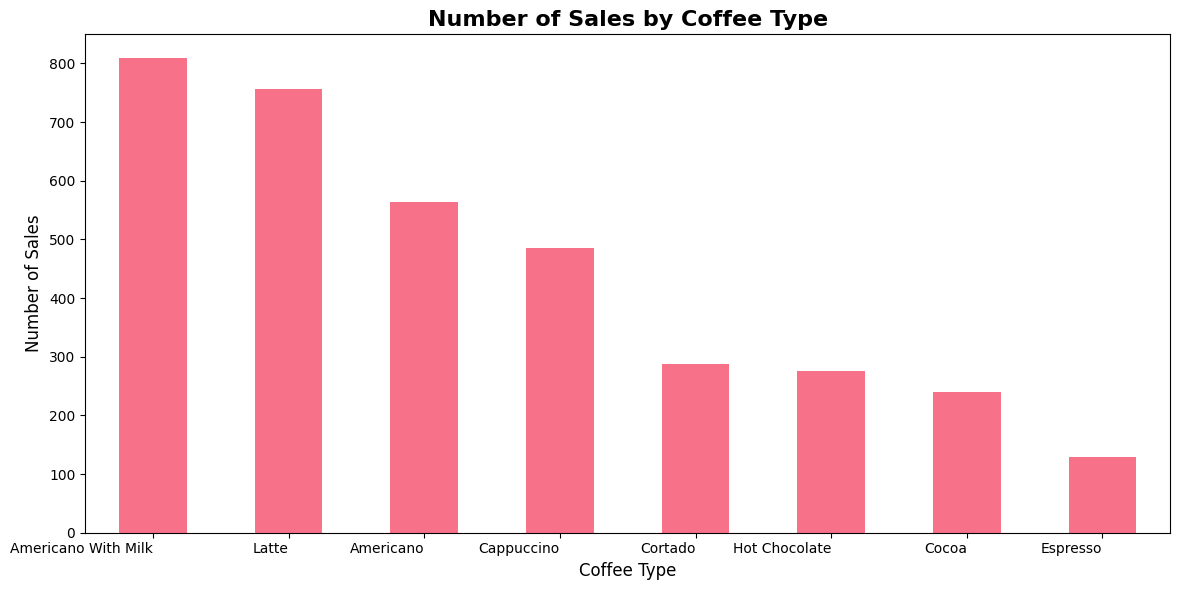

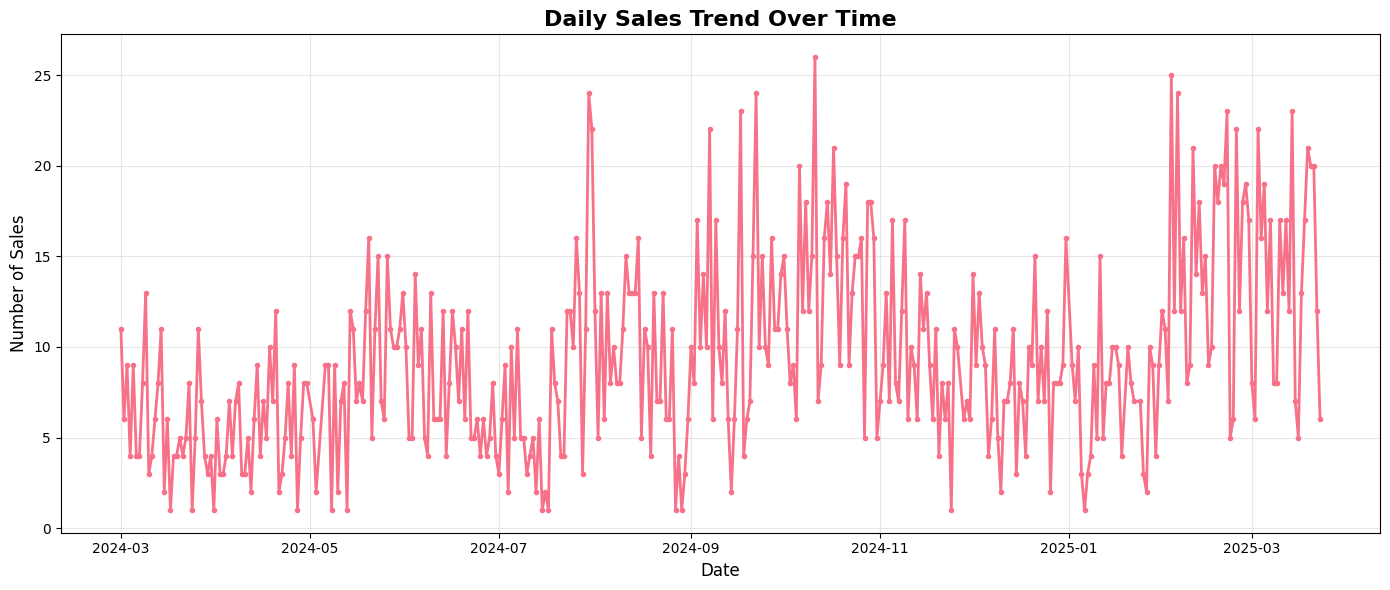

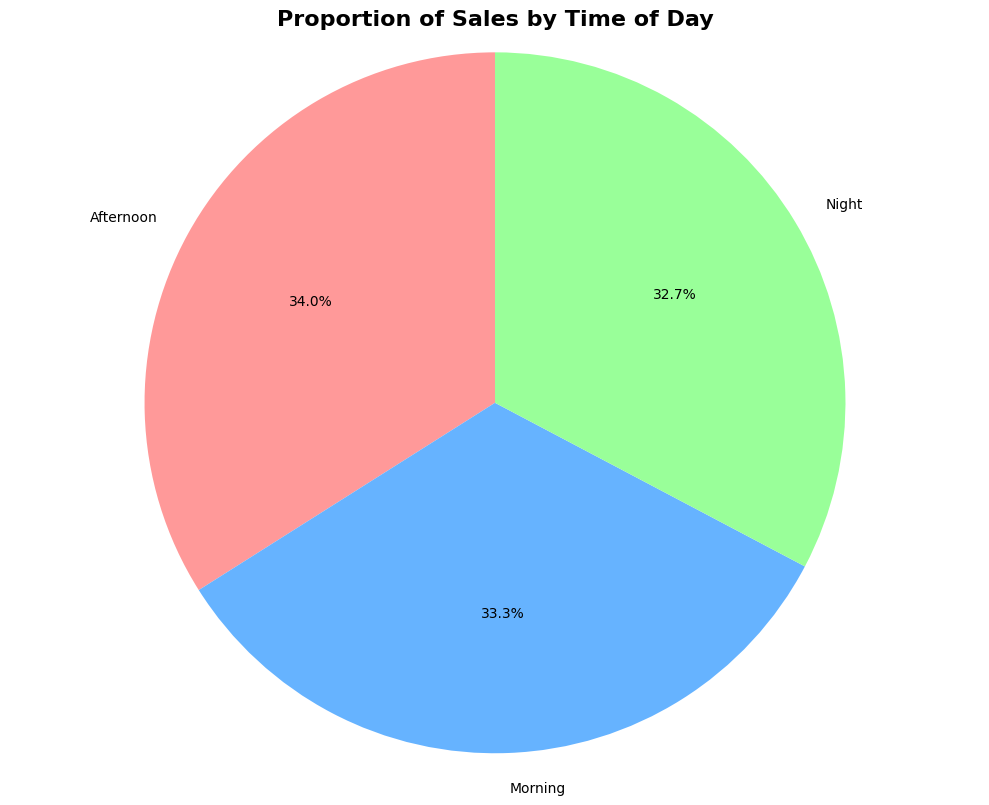

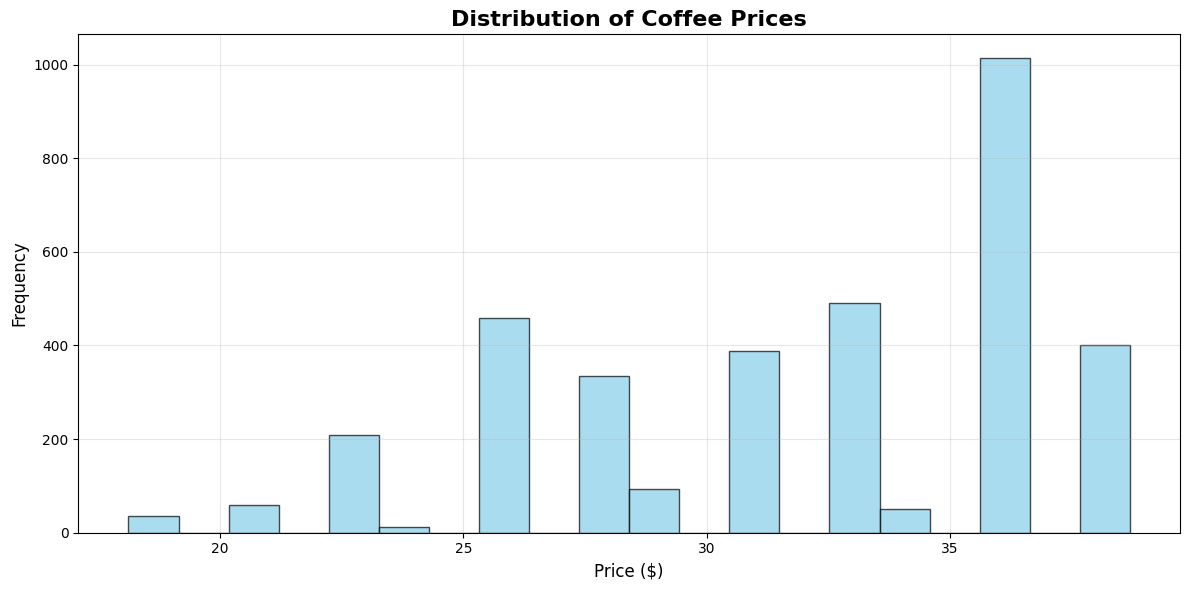

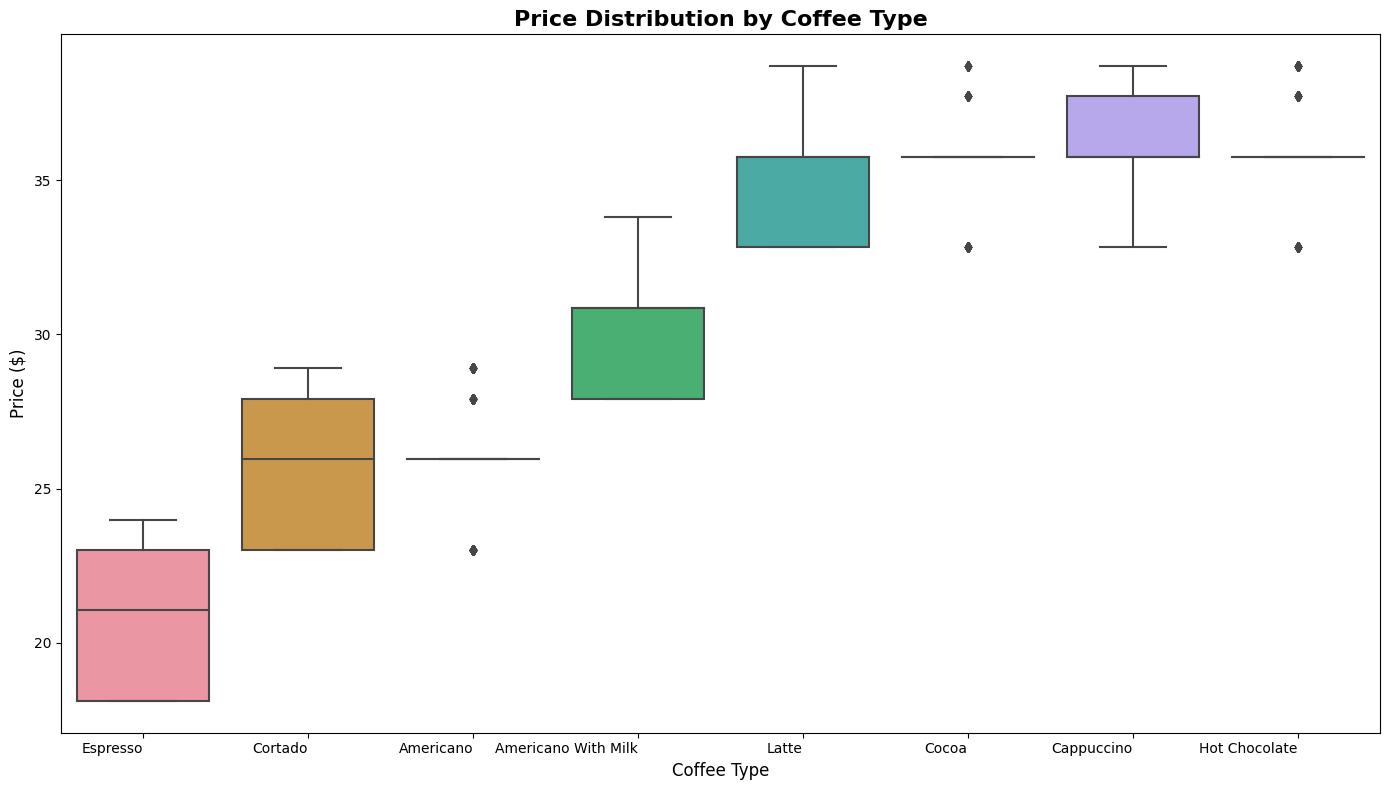

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_palette("husl")

plt.figure(figsize=(12, 6))
coffee_counts = df['coffee_name'].value_counts()
coffee_counts.plot(kind='bar')
plt.title('Number of Sales by Coffee Type', fontsize=16, fontweight='bold')
plt.xlabel('Coffee Type', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
daily_sales = df.groupby('Date').size()

plt.plot(daily_sales.index, daily_sales.values, linewidth=2, marker='o', markersize=3)
plt.title('Daily Sales Trend Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
time_of_day_counts = df['Time_of_Day'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99']
plt.pie(time_of_day_counts.values, labels=time_of_day_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Proportion of Sales by Time of Day', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(df['money'], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Distribution of Coffee Prices', fontsize=16, fontweight='bold')
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
df_sorted = df.sort_values('money')
sns.boxplot(data=df_sorted, x='coffee_name', y='money')
plt.title('Price Distribution by Coffee Type', fontsize=16, fontweight='bold')
plt.xlabel('Coffee Type', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

# **Sales Analysis**

In [35]:
#Best-selling coffee
best_selling_coffee = df['coffee_name'].value_counts().idxmax()
best_selling_count = df['coffee_name'].value_counts().max()
print(f"Best-selling coffee: {best_selling_coffee} ({best_selling_count} sales)")

#Total revenue for each coffee type
revenue_by_coffee = df.groupby('coffee_name')['money'].sum().round(2)
print("\nTotal revenue by coffee type ($):")
print(revenue_by_coffee)

#Busiest hour of the day for coffee sales
busiest_hour = df['hour_of_day'].value_counts().idxmax()
busiest_hour_count = df['hour_of_day'].value_counts().max()
print(f"\nBusiest hour: {int(busiest_hour)}:00 ({busiest_hour_count} sales)")

#Day of the week with the highest sales
highest_sales_day = df['Weekday'].value_counts().idxmax()
highest_sales_count = df['Weekday'].value_counts().max()
print(f"\nDay with highest sales: {highest_sales_day} ({highest_sales_count} sales)")

#Seasonal trend in coffee sales (by month)
monthly_sales = df.groupby('Month_name').size()
print("\nMonthly sales count:")
print(monthly_sales)

Best-selling coffee: Americano With Milk (809 sales)

Total revenue by coffee type ($):
coffee_name
Americano              14650.26
Americano With Milk    24751.12
Cappuccino             17439.14
Cocoa                   8521.16
Cortado                 7384.86
Espresso                2690.28
Hot Chocolate           9933.46
Latte                  26875.30
Name: money, dtype: float64

Busiest hour: 10:00 (328 sales)

Day with highest sales: Tue (572 sales)

Monthly sales count:
Month_name
Apr    168
Aug    272
Dec    259
Feb    423
Jan    201
Jul    237
Jun    223
Mar    494
May    241
Nov    259
Oct    426
Sep    344
dtype: int64


# **Customer Behavior Analysis**

=== CUSTOMER BEHAVIOR ANALYSIS ===

1. Time of Day vs Coffee Type Analysis:
Percentage distribution of coffee types by time of day:
coffee_name  Americano  Americano With Milk  Cappuccino  Cocoa  Cortado  \
Time_of_Day                                                               
Afternoon        19.34                19.83       13.61   6.22     7.30   
Morning          18.54                28.03       10.33   4.91    12.11   
Night             9.65                20.59       17.23   9.13     4.82   

coffee_name  Espresso  Hot Chocolate  Latte  
Time_of_Day                                  
Afternoon        4.65           6.64  22.41  
Morning          3.73           4.15  18.20  
Night            2.50          12.66  23.43  


<Figure size 1400x800 with 0 Axes>

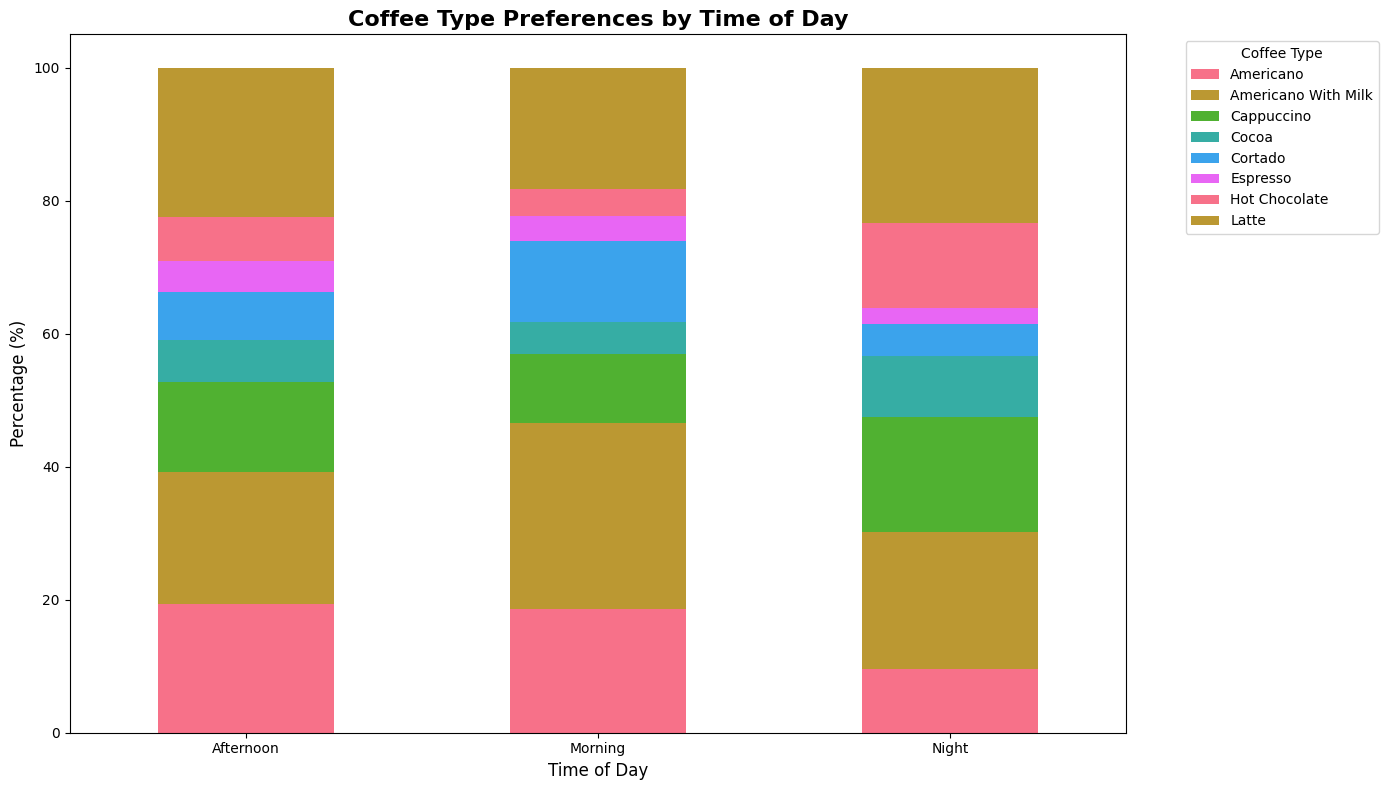


2. Weekday vs Weekend Analysis:
Weekday sales: 2658
Weekend sales: 889
Weekend sales percentage: 25.1%
Average spending - Weekdays: $31.67
Average spending - Weekends: $31.57


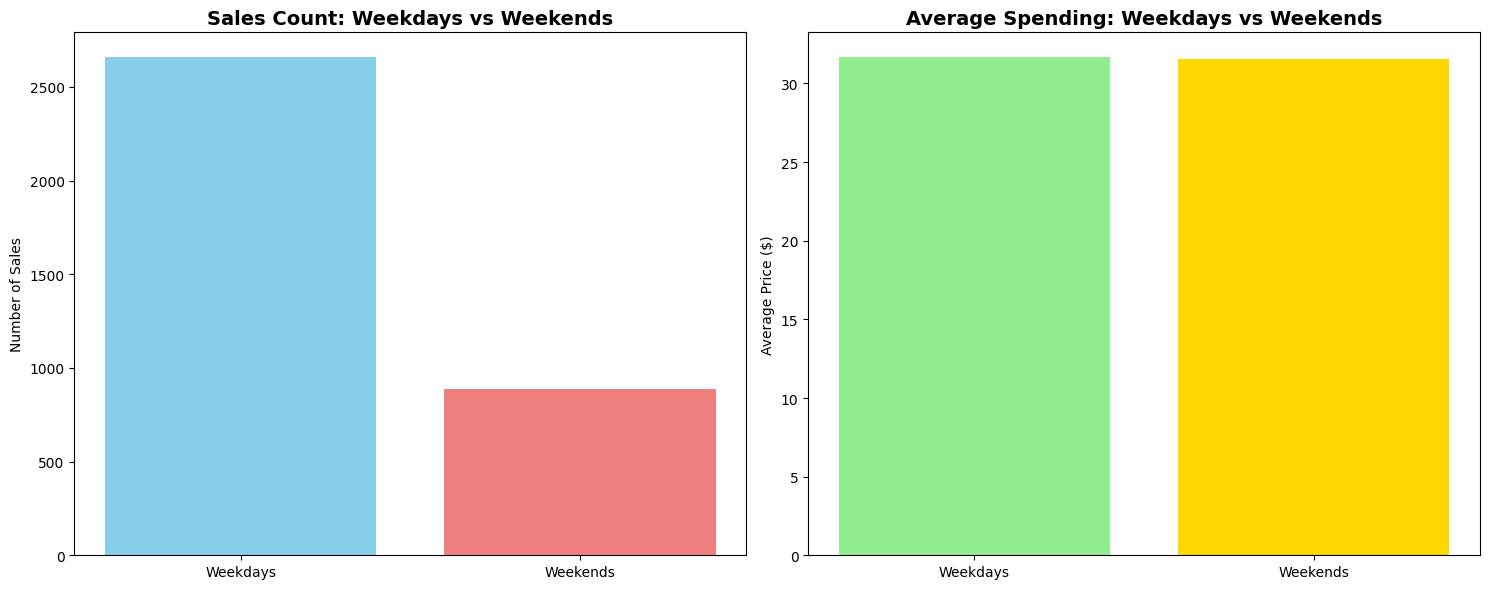


3. Average Spending Analysis:
Average spending per transaction: $31.65
Median spending per transaction: $32.82

Average spending by coffee type:
                      mean  median  count
coffee_name                              
Americano            25.98   25.96    564
Americano With Milk  30.59   30.86    809
Cappuccino           35.88   35.76    486
Cocoa                35.65   35.76    239
Cortado              25.73   25.96    287
Espresso             20.85   21.06    129
Hot Chocolate        35.99   35.76    276
Latte                35.50   35.76    757

=== STATISTICAL ANALYSIS & HYPOTHESIS TESTING ===

1. Latte vs Cappuccino Price Comparison:
Latte - Count: 757, Mean: $35.50, Std: $1.82
Cappuccino - Count: 486, Mean: $35.88, Std: $1.82
T-test results: t-statistic = -3.5975, p-value = 0.0003
Conclusion: There is a statistically significant difference between Latte and Cappuccino prices.


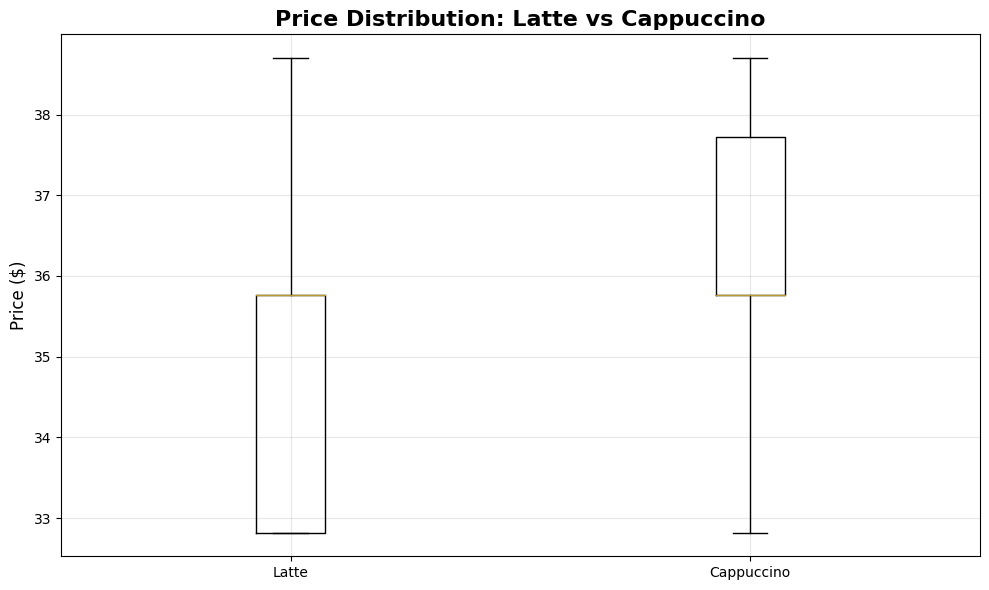


2. Day of Week Impact on Sales:
Hypothesis: Sales volume differs significantly between different days of the week.

Sales by day of week:
  Mon: 544 sales
  Tue: 572 sales
  Wed: 500 sales
  Thu: 510 sales
  Fri: 532 sales
  Sat: 470 sales
  Sun: 419 sales

ANOVA test results: F-statistic = 0.8452, p-value = 0.5348
Conclusion: No statistically significant difference in sales between different days of the week.


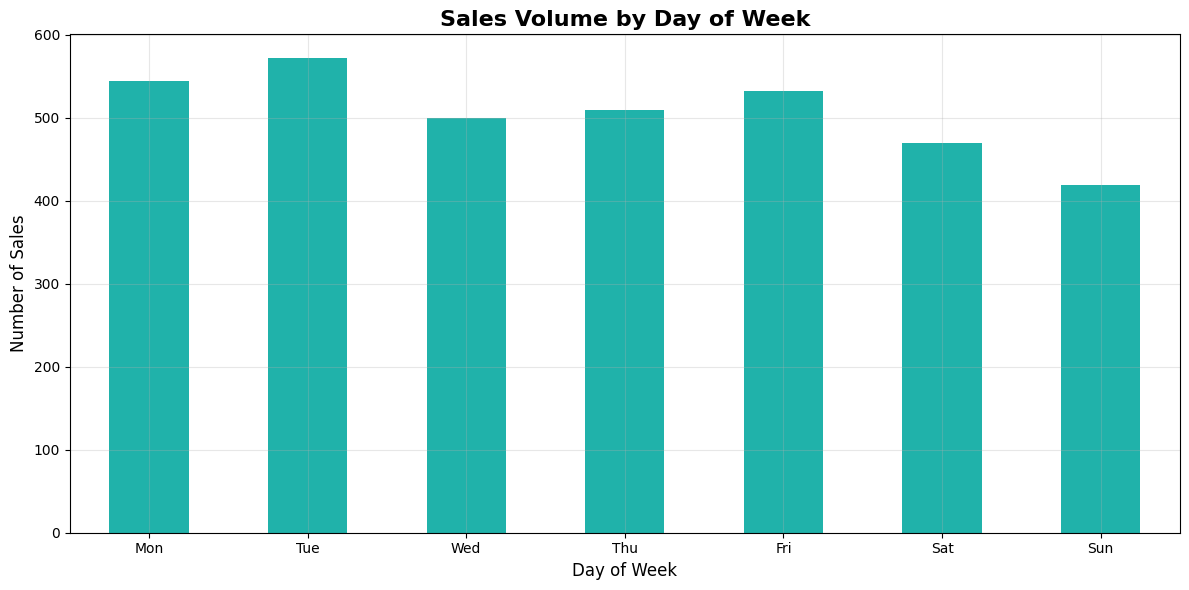

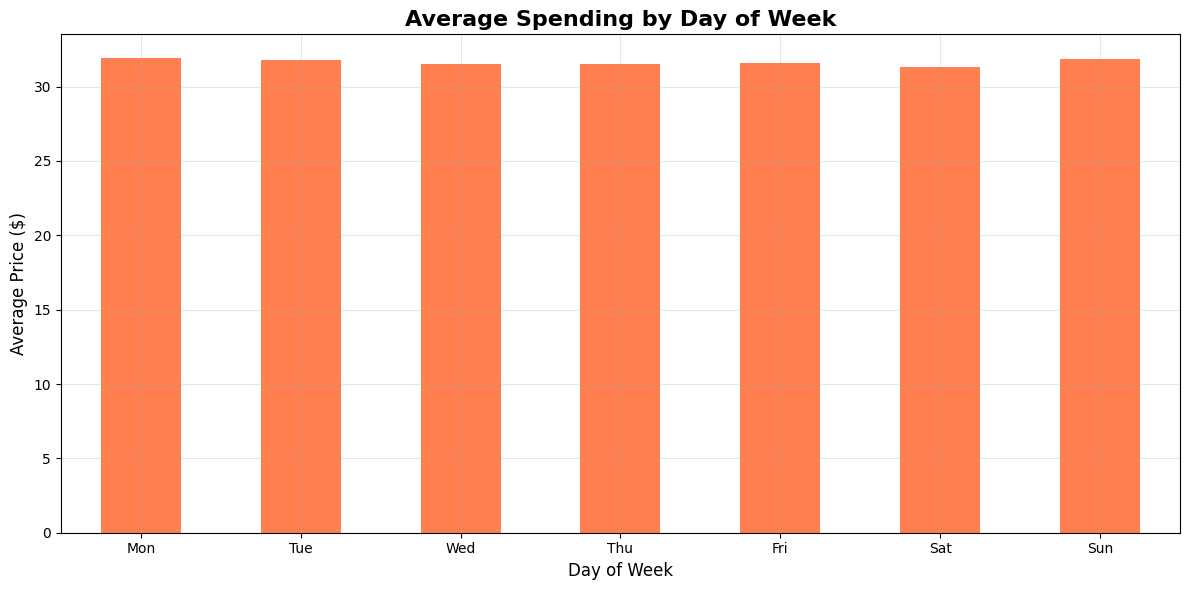


=== SUMMARY ===
Total transactions analyzed: 3547
Overall average spending: $31.65
Most popular coffee: Americano With Milk
Busiest day: Mon
Peak time: Afternoon


In [38]:
from scipy import stats
import warnings
warnings.filterwarnings('ignore')



print("=== CUSTOMER BEHAVIOR ANALYSIS ===\n")

# 1. Relationship between time of day and type of coffee purchased
print("1. Time of Day vs Coffee Type Analysis:")
time_coffee_ct = pd.crosstab(df['Time_of_Day'], df['coffee_name'], normalize='index') * 100
print("Percentage distribution of coffee types by time of day:")
print(time_coffee_ct.round(2))

plt.figure(figsize=(14, 8))
time_coffee_ct.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Coffee Type Preferences by Time of Day', fontsize=16, fontweight='bold')
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Sales patterns: Weekdays vs Weekends
print("\n2. Weekday vs Weekend Analysis:")
df['Weekday'] = df['Weekday']
df['is_weekend'] = df['Weekday'].isin(['Sat', 'Sun'])

weekend_sales = df.groupby('is_weekend').size()
print(f"Weekday sales: {weekend_sales[False]}")
print(f"Weekend sales: {weekend_sales[True]}")
print(f"Weekend sales percentage: {(weekend_sales[True] / len(df) * 100):.1f}%")

# Average spending by weekday/weekend
avg_spending_weekday = df[df['is_weekend'] == False]['money'].mean()
avg_spending_weekend = df[df['is_weekend'] == True]['money'].mean()
print(f"Average spending - Weekdays: ${avg_spending_weekday:.2f}")
print(f"Average spending - Weekends: ${avg_spending_weekend:.2f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
labels = ['Weekdays', 'Weekends']
sales_counts = [weekend_sales[False], weekend_sales[True]]
ax1.bar(labels, sales_counts, color=['skyblue', 'lightcoral'])
ax1.set_title('Sales Count: Weekdays vs Weekends', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Sales')

avg_spending = [avg_spending_weekday, avg_spending_weekend]
ax2.bar(labels, avg_spending, color=['lightgreen', 'gold'])
ax2.set_title('Average Spending: Weekdays vs Weekends', fontsize=14, fontweight='bold')
ax2.set_ylabel('Average Price ($)')

plt.tight_layout()
plt.show()

# 3. Average spending per transaction
print("\n3. Average Spending Analysis:")
avg_spending_total = df['money'].mean()
median_spending = df['money'].median()
print(f"Average spending per transaction: ${avg_spending_total:.2f}")
print(f"Median spending per transaction: ${median_spending:.2f}")

spending_by_coffee = df.groupby('coffee_name')['money'].agg(['mean', 'median', 'count']).round(2)
print("\nAverage spending by coffee type:")
print(spending_by_coffee)

print("\n=== STATISTICAL ANALYSIS & HYPOTHESIS TESTING ===\n")

print("1. Latte vs Cappuccino Price Comparison:")

latte_prices = df[df['coffee_name'] == 'Latte']['money']
cappuccino_prices = df[df['coffee_name'] == 'Cappuccino']['money']

print(f"Latte - Count: {len(latte_prices)}, Mean: ${latte_prices.mean():.2f}, Std: ${latte_prices.std():.2f}")
print(f"Cappuccino - Count: {len(cappuccino_prices)}, Mean: ${cappuccino_prices.mean():.2f}, Std: ${cappuccino_prices.std():.2f}")

# Perform t-test
t_stat, p_value = stats.ttest_ind(latte_prices, cappuccino_prices, equal_var=False)
print(f"T-test results: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: There is a statistically significant difference between Latte and Cappuccino prices.")
else:
    print("Conclusion: No statistically significant difference between Latte and Cappuccino prices.")

plt.figure(figsize=(10, 6))
price_data = [latte_prices, cappuccino_prices]
labels = ['Latte', 'Cappuccino']
plt.boxplot(price_data, labels=labels)
plt.title('Price Distribution: Latte vs Cappuccino', fontsize=16, fontweight='bold')
plt.ylabel('Price ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Hypothesis about day of week impact on sales
print("\n2. Day of Week Impact on Sales:")
print("Hypothesis: Sales volume differs significantly between different days of the week.")

# Sales by day of week
sales_by_day = df['Weekday'].value_counts().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
print("\nSales by day of week:")
for day, count in sales_by_day.items():
    print(f"  {day}: {count} sales")

day_groups = []
days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

for day in days_order:
    day_sales = df[df['Weekday'] == day]['money']
    day_groups.append(day_sales)

# Perform one-way ANOVA
f_stat, p_value_anova = stats.f_oneway(*day_groups)
print(f"\nANOVA test results: F-statistic = {f_stat:.4f}, p-value = {p_value_anova:.4f}")

if p_value_anova < 0.05:
    print("Conclusion: There is a statistically significant difference in sales between different days of the week.")
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    day_data = []
    day_labels = []
    
    for day in days_order:
        day_sales = df[df['Weekday'] == day]['money']
        day_data.extend(day_sales)
        day_labels.extend([day] * len(day_sales))
    
    tukey = pairwise_tukeyhsd(day_data, day_labels, alpha=0.05)
    print("\nTukey HSD Post-hoc Test Results:")
    print(tukey)
else:
    print("Conclusion: No statistically significant difference in sales between different days of the week.")

plt.figure(figsize=(12, 6))
sales_by_day.plot(kind='bar', color='lightseagreen')
plt.title('Sales Volume by Day of Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
avg_spending_by_day = df.groupby('Weekday')['money'].mean().reindex(days_order)
avg_spending_by_day.plot(kind='bar', color='coral')
plt.title('Average Spending by Day of Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n=== SUMMARY ===")
print(f"Total transactions analyzed: {len(df)}")
print(f"Overall average spending: ${df['money'].mean():.2f}")
print(f"Most popular coffee: {df['coffee_name'].value_counts().index[0]}")
print(f"Busiest day: {sales_by_day.index[0]}")
print(f"Peak time: {df['Time_of_Day'].value_counts().index[0]}")

=== MACHINE LEARNING: PREDICTIVE MODELING ===

1. Predicting Coffee Name Based on Time Features:
Model Accuracy: 0.2324
Cross-validation score: 0.2134

Feature Importance:
       feature  importance
0  hour_of_day    0.504937
2      Weekday    0.429355
1  Time_of_Day    0.065708


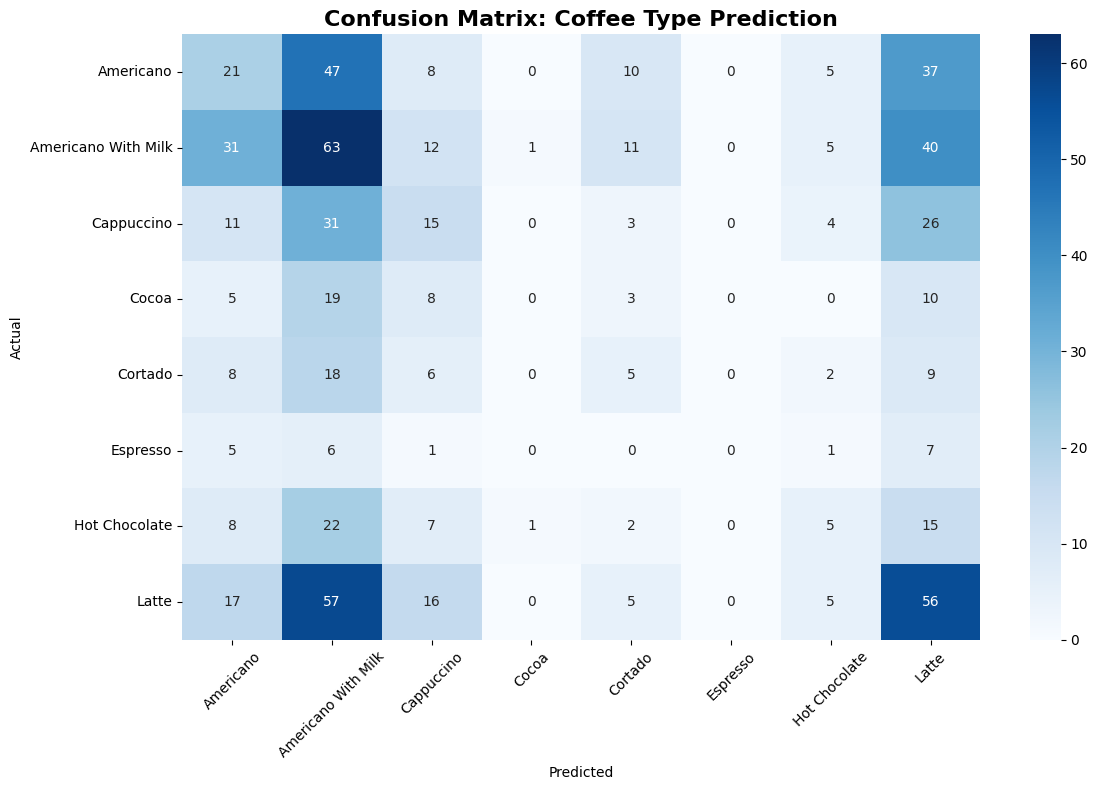


2. Time Series Forecasting for Coffee Sales:
Time Series Features to Consider:
1. Date features: year, month, day, dayofweek, is_weekend
2. Lag features: sales from previous days (lag-1, lag-7)
3. Rolling statistics: 7-day moving average
4. Seasonal patterns: day of week, month trends
5. Holiday indicators
6. Weather data (if available)

Sample of prepared time series data:
        Date  Sales_Count  dayofweek  month  is_weekend
0 2024-03-01           11          4      3           0
1 2024-03-02            6          5      3           1
2 2024-03-03            9          6      3           1
3 2024-03-04            4          0      3           0
4 2024-03-05            9          1      3           0


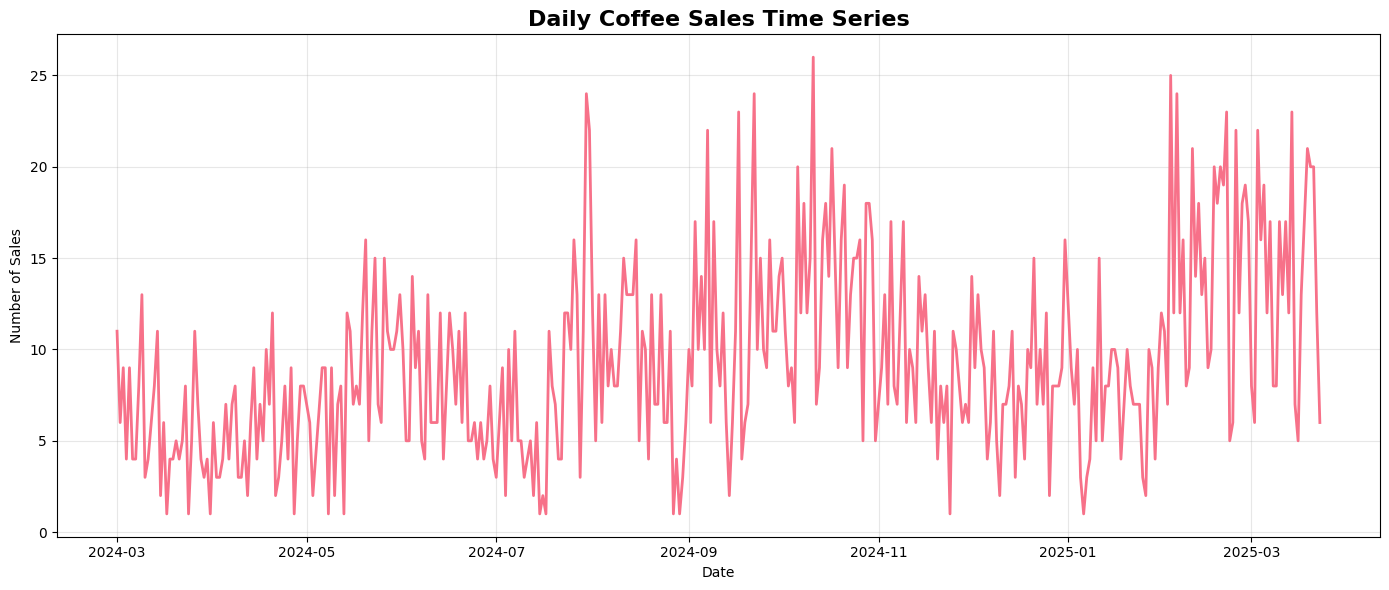


3. Price Prediction Based on Coffee Features:
Price Prediction Model Performance:
Root Mean Squared Error: $1.93
R² Score: 0.8368
Mean Absolute Error: $1.50

Feature Importance for Price Prediction:
       feature  importance
0  coffee_name    0.939948
1  hour_of_day    0.031987
3      Weekday    0.025730
2  Time_of_Day    0.002336


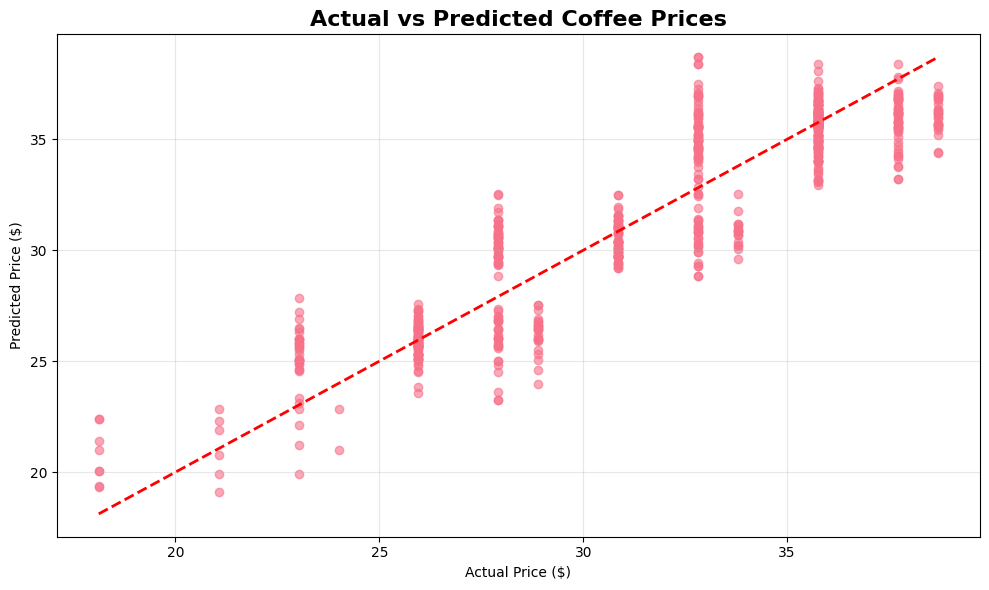


=== MACHINE LEARNING: CLUSTERING ===

4. Customer Transaction Clustering:


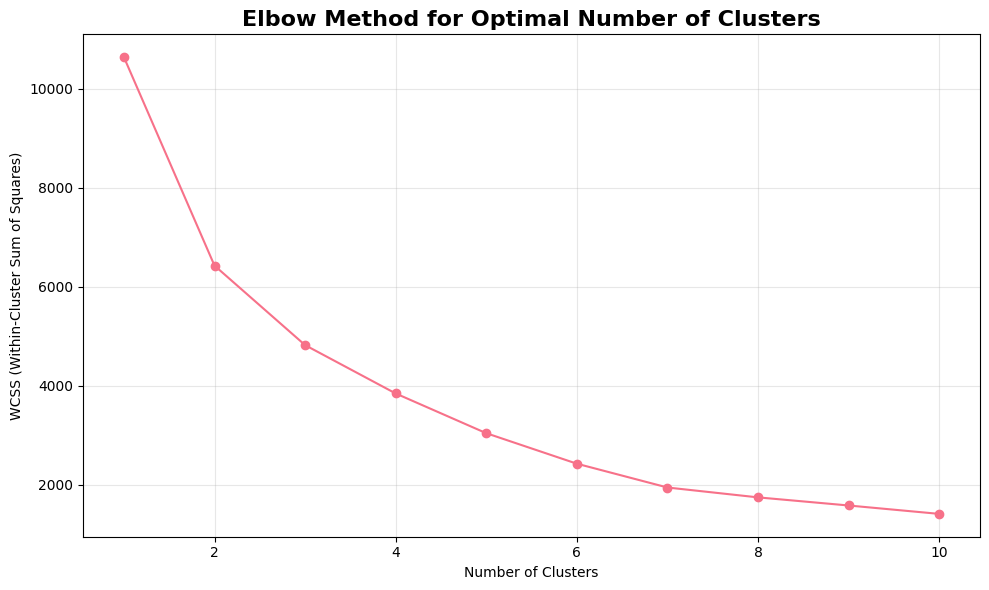

Cluster Analysis:
         money       hour_of_day                coffee_name Time_of_Day  \
          mean   std        mean   std             <lambda>    <lambda>   
cluster                                                                   
0        35.83  1.72       10.17  1.86                Latte     Morning   
1        27.05  3.45       11.46  2.76            Americano     Morning   
2        32.79  3.88       17.94  2.48  Americano With Milk       Night   
3        35.64  1.68       17.80  2.43                Latte       Night   

         Weekday  
        <lambda>  
cluster           
0            Fri  
1            Tue  
2            Tue  
3            Mon  


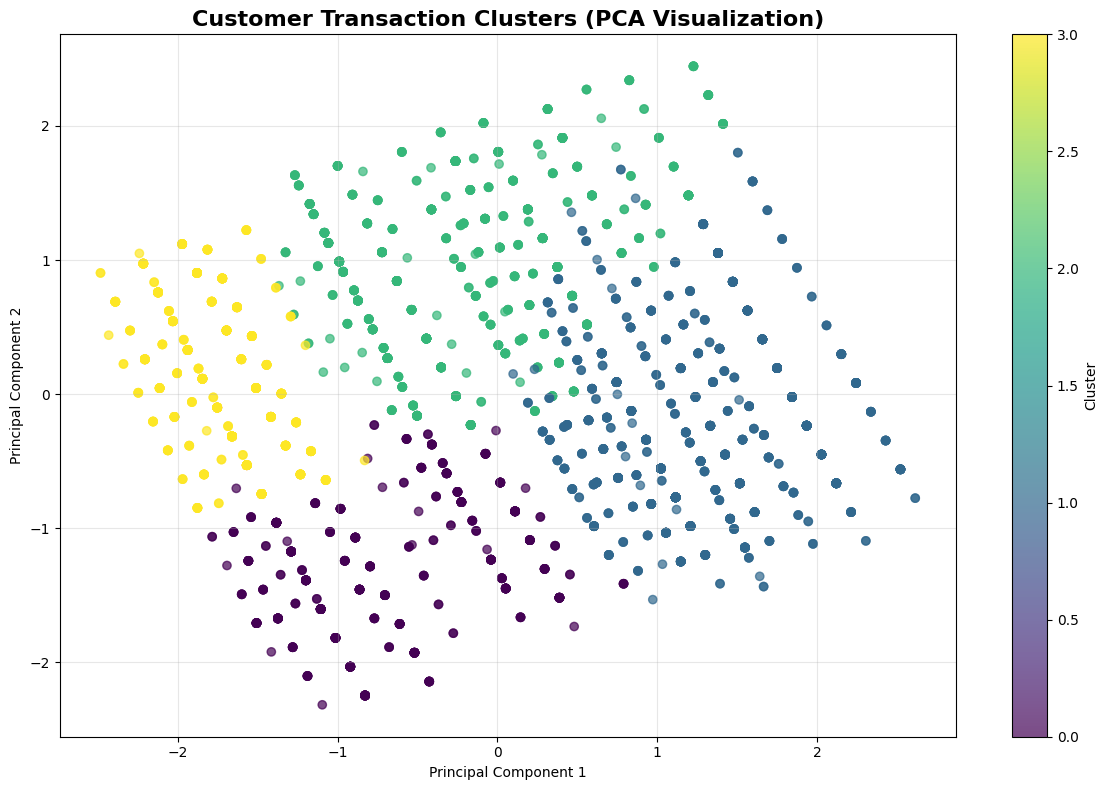


Cluster Interpretation:

Cluster 0:
  Size: 581 transactions
  Average spending: $35.83
  Most common coffee: Latte
  Most common time: Morning
  Peak hour: 10:00

Cluster 1:
  Size: 1344 transactions
  Average spending: $27.05
  Most common coffee: Americano
  Most common time: Morning
  Peak hour: 10:00

Cluster 2:
  Size: 960 transactions
  Average spending: $32.79
  Most common coffee: Americano With Milk
  Most common time: Night
  Peak hour: 18:00

Cluster 3:
  Size: 662 transactions
  Average spending: $35.64
  Most common coffee: Latte
  Most common time: Night
  Peak hour: 16:00


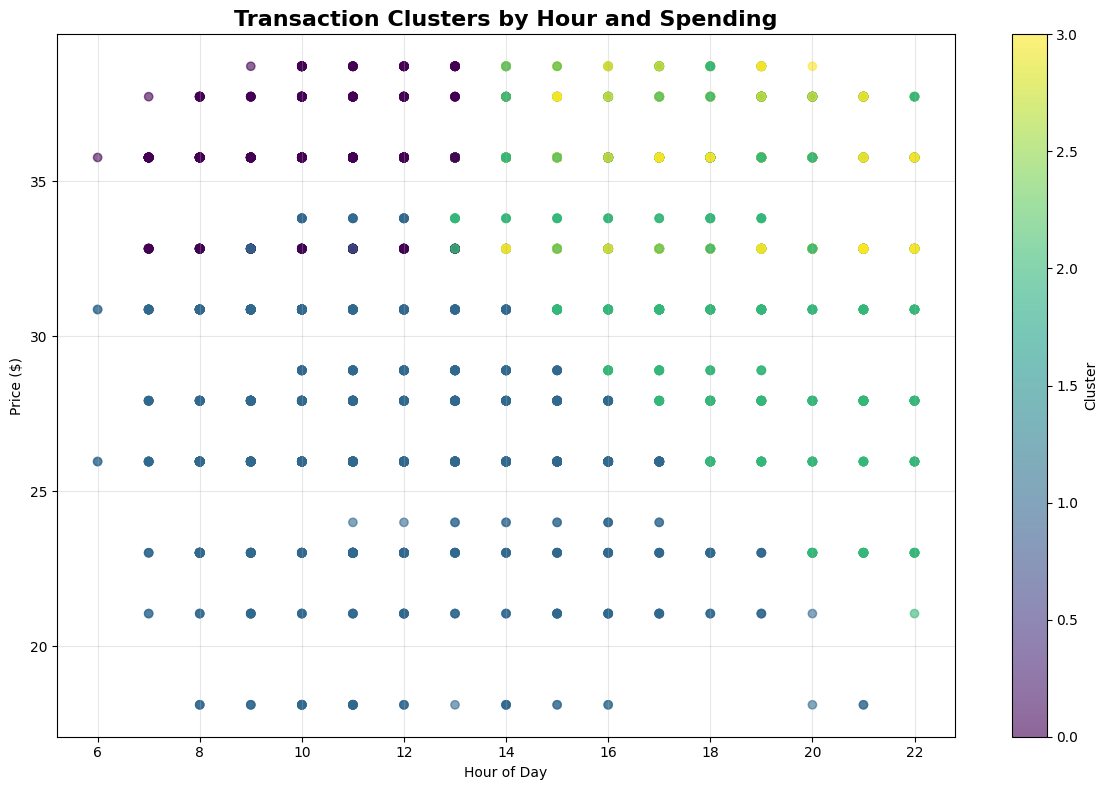


=== MACHINE LEARNING SUMMARY ===
Coffee Type Prediction Accuracy: 0.2324
Price Prediction R² Score: 0.8368
Number of Transaction Clusters: 4
Most Informative Feature for Coffee Prediction: hour_of_day
Most Informative Feature for Price Prediction: coffee_name


In [39]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print("=== MACHINE LEARNING: PREDICTIVE MODELING ===\n")

print("1. Predicting Coffee Name Based on Time Features:")

# Prepare features and target
features = ['hour_of_day', 'Time_of_Day', 'Weekday']
X = df[features].copy()
y = df['coffee_name']

# Encode categorical variables
le_time = LabelEncoder()
le_weekday = LabelEncoder()
le_coffee = LabelEncoder()

X['Time_of_Day_encoded'] = le_time.fit_transform(X['Time_of_Day'])
X['Weekday_encoded'] = le_weekday.fit_transform(X['Weekday'])
y_encoded = le_coffee.fit_transform(y)

X_final = X[['hour_of_day', 'Time_of_Day_encoded', 'Weekday_encoded']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_final, y_encoded, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print(f"Cross-validation score: {cross_val_score(rf_classifier, X_final, y_encoded, cv=5).mean():.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': ['hour_of_day', 'Time_of_Day', 'Weekday'],
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Confusion Matrix
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=le_coffee.classes_, 
           yticklabels=le_coffee.classes_)
plt.title('Confusion Matrix: Coffee Type Prediction', fontsize=16, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#Time Series Forecasting Approach
print("\n2. Time Series Forecasting for Coffee Sales:")

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
daily_sales = df.groupby('Date').size().reset_index()
daily_sales.columns = ['Date', 'Sales_Count']

print("Time Series Features to Consider:")
print("1. Date features: year, month, day, dayofweek, is_weekend")
print("2. Lag features: sales from previous days (lag-1, lag-7)")
print("3. Rolling statistics: 7-day moving average")
print("4. Seasonal patterns: day of week, month trends")
print("5. Holiday indicators")
print("6. Weather data (if available)")

# Create time series features for demonstration
daily_sales['dayofweek'] = daily_sales['Date'].dt.dayofweek
daily_sales['month'] = daily_sales['Date'].dt.month
daily_sales['is_weekend'] = daily_sales['dayofweek'].isin([5, 6]).astype(int)

# Show sample of prepared time series data
print("\nSample of prepared time series data:")
print(daily_sales.head())

# Visualization of time series
plt.figure(figsize=(14, 6))
plt.plot(daily_sales['Date'], daily_sales['Sales_Count'], linewidth=2)
plt.title('Daily Coffee Sales Time Series', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Price Prediction Model
print("\n3. Price Prediction Based on Coffee Features:")

# Prepare data for price prediction
price_features = ['coffee_name', 'hour_of_day', 'Time_of_Day', 'Weekday']
X_price = df[price_features].copy()
y_price = df['money']

# Encode categorical variables
le_coffee_price = LabelEncoder()
le_time_price = LabelEncoder()
le_weekday_price = LabelEncoder()

X_price['coffee_name_encoded'] = le_coffee_price.fit_transform(X_price['coffee_name'])
X_price['Time_of_Day_encoded'] = le_time_price.fit_transform(X_price['Time_of_Day'])
X_price['Weekday_encoded'] = le_weekday_price.fit_transform(X_price['Weekday'])

X_price_final = X_price[['coffee_name_encoded', 'hour_of_day', 'Time_of_Day_encoded', 'Weekday_encoded']]

# Split data
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_price_final, y_price, test_size=0.2, random_state=42)

# Train Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_p, y_train_p)

# Make predictions
y_pred_p = rf_regressor.predict(X_test_p)

# Evaluate model
mse = mean_squared_error(y_test_p, y_pred_p)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_p, y_pred_p)

print(f"Price Prediction Model Performance:")
print(f"Root Mean Squared Error: ${rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: ${np.mean(np.abs(y_test_p - y_pred_p)):.2f}")

# Feature importance for price prediction
feature_importance_price = pd.DataFrame({
    'feature': ['coffee_name', 'hour_of_day', 'Time_of_Day', 'Weekday'],
    'importance': rf_regressor.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance for Price Prediction:")
print(feature_importance_price)

# Visualization of actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test_p, y_pred_p, alpha=0.6)
plt.plot([y_test_p.min(), y_test_p.max()], [y_test_p.min(), y_test_p.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs Predicted Coffee Prices', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n=== MACHINE LEARNING: CLUSTERING ===\n")

# 4. Customer Transaction Clustering
print("4. Customer Transaction Clustering:")

# Features for clustering
clustering_features = ['money', 'hour_of_day', 'coffee_name']
X_cluster = df[clustering_features].copy()

# Encode coffee names for clustering
le_cluster = LabelEncoder()
X_cluster['coffee_name_encoded'] = le_cluster.fit_transform(X_cluster['coffee_name'])

# Standardize features
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster[['money', 'hour_of_day', 'coffee_name_encoded']])

# Determine optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_cluster_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=16, fontweight='bold')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Apply K-Means with optimal clusters (let's choose 4 based on elbow)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_cluster_scaled)

# Add cluster labels to dataframe
df['cluster'] = cluster_labels

# Analyze clusters
cluster_analysis = df.groupby('cluster').agg({
    'money': ['mean', 'std'],
    'hour_of_day': ['mean', 'std'],
    'coffee_name': lambda x: x.mode()[0],
    'Time_of_Day': lambda x: x.mode()[0],
    'Weekday': lambda x: x.mode()[0]
}).round(2)

print("Cluster Analysis:")
print(cluster_analysis)

# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title('Customer Transaction Clusters (PCA Visualization)', fontsize=16, fontweight='bold')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Interpret clusters
print("\nCluster Interpretation:")
for cluster in range(optimal_clusters):
    cluster_data = df[df['cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"  Size: {len(cluster_data)} transactions")
    print(f"  Average spending: ${cluster_data['money'].mean():.2f}")
    print(f"  Most common coffee: {cluster_data['coffee_name'].mode()[0]}")
    print(f"  Most common time: {cluster_data['Time_of_Day'].mode()[0]}")
    print(f"  Peak hour: {cluster_data['hour_of_day'].mode()[0]}:00")

# Additional clustering visualization by spending and time
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['hour_of_day'], df['money'], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Transaction Clusters by Hour and Spending', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n=== MACHINE LEARNING SUMMARY ===")
print(f"Coffee Type Prediction Accuracy: {accuracy:.4f}")
print(f"Price Prediction R² Score: {r2:.4f}")
print(f"Number of Transaction Clusters: {optimal_clusters}")
print(f"Most Informative Feature for Coffee Prediction: {feature_importance.iloc[0]['feature']}")
print(f"Most Informative Feature for Price Prediction: {feature_importance_price.iloc[0]['feature']}")